### BookBike Case Study

### Step 1 : Reading and understanding the data

In [1]:
# import the necessary libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the bike data and display the first 5 row
df = pd.read_csv("day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# dropping the unnecesary column
df.drop(["instant","casual","registered"],axis=1,inplace=True)
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


### Inspect the various aspects of the dataframe

In [4]:
df.shape

(730, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  cnt         730 non-null    int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 74.3+ KB


In [6]:
df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [7]:
# Check the missing values
df.isnull().sum()

dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

### Step 2: Visualising the Data

In [8]:
cat_cols = ["season","yr","mnth","holiday","weekday","workingday","weathersit"]
num_cols = ["temp","atemp","hum","windspeed","cnt"]

### Analyzing the data with pairplot

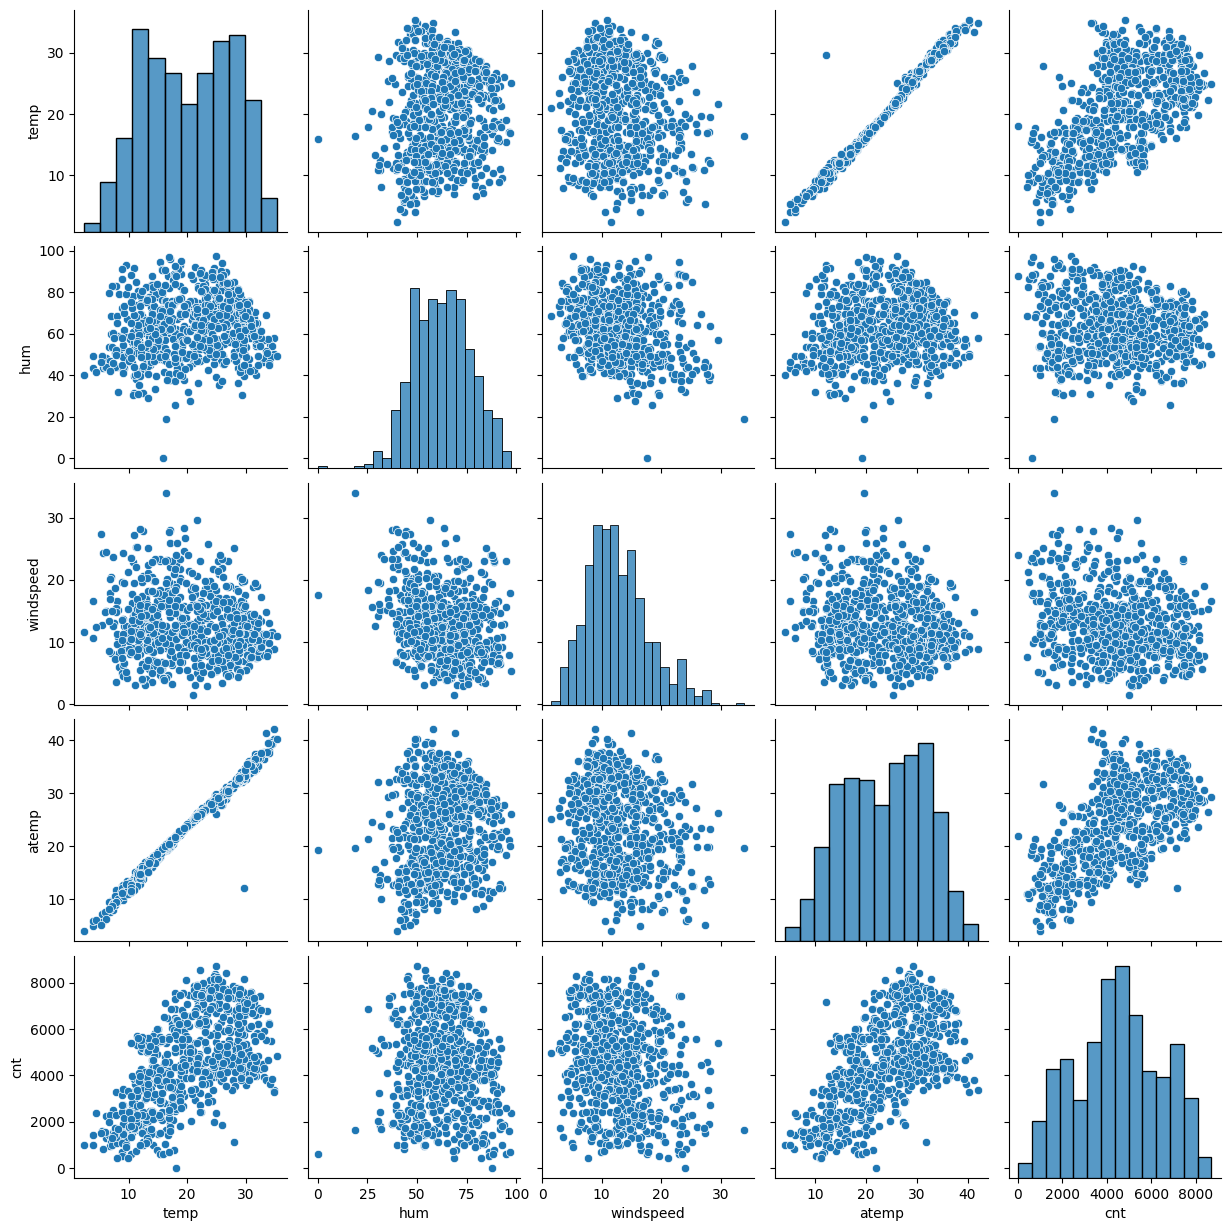

In [9]:
sns.pairplot(df, vars=["temp","hum","windspeed","atemp","cnt"])

### Analyzing the categorical column with target variable

In [10]:
# We need to map the original labels to values assigned
# Mapping the correct labels against the data
df["season"] = df["season"].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
df["weathersit"] = df["weathersit"].map({1:'Clear',2:'Mist Cloudy',2:'Light Snow',3:'Heavy Rain'})

df["dteday"] = pd.to_datetime(df["dteday"],format="%d-%m-%Y")
df["mnth"] = df["dteday"].dt.strftime("%b")
df["weekday"] = df["dteday"].dt.strftime("%A")

In [11]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,2018-01-01,spring,0,Jan,0,Monday,0,Light Snow,14.110847,18.18125,80.5833,10.749882,985
1,2018-01-02,spring,0,Jan,0,Tuesday,0,Light Snow,14.902598,17.68695,69.6087,16.652113,801
2,2018-01-03,spring,0,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,2018-01-04,spring,0,Jan,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,2018-01-05,spring,0,Jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


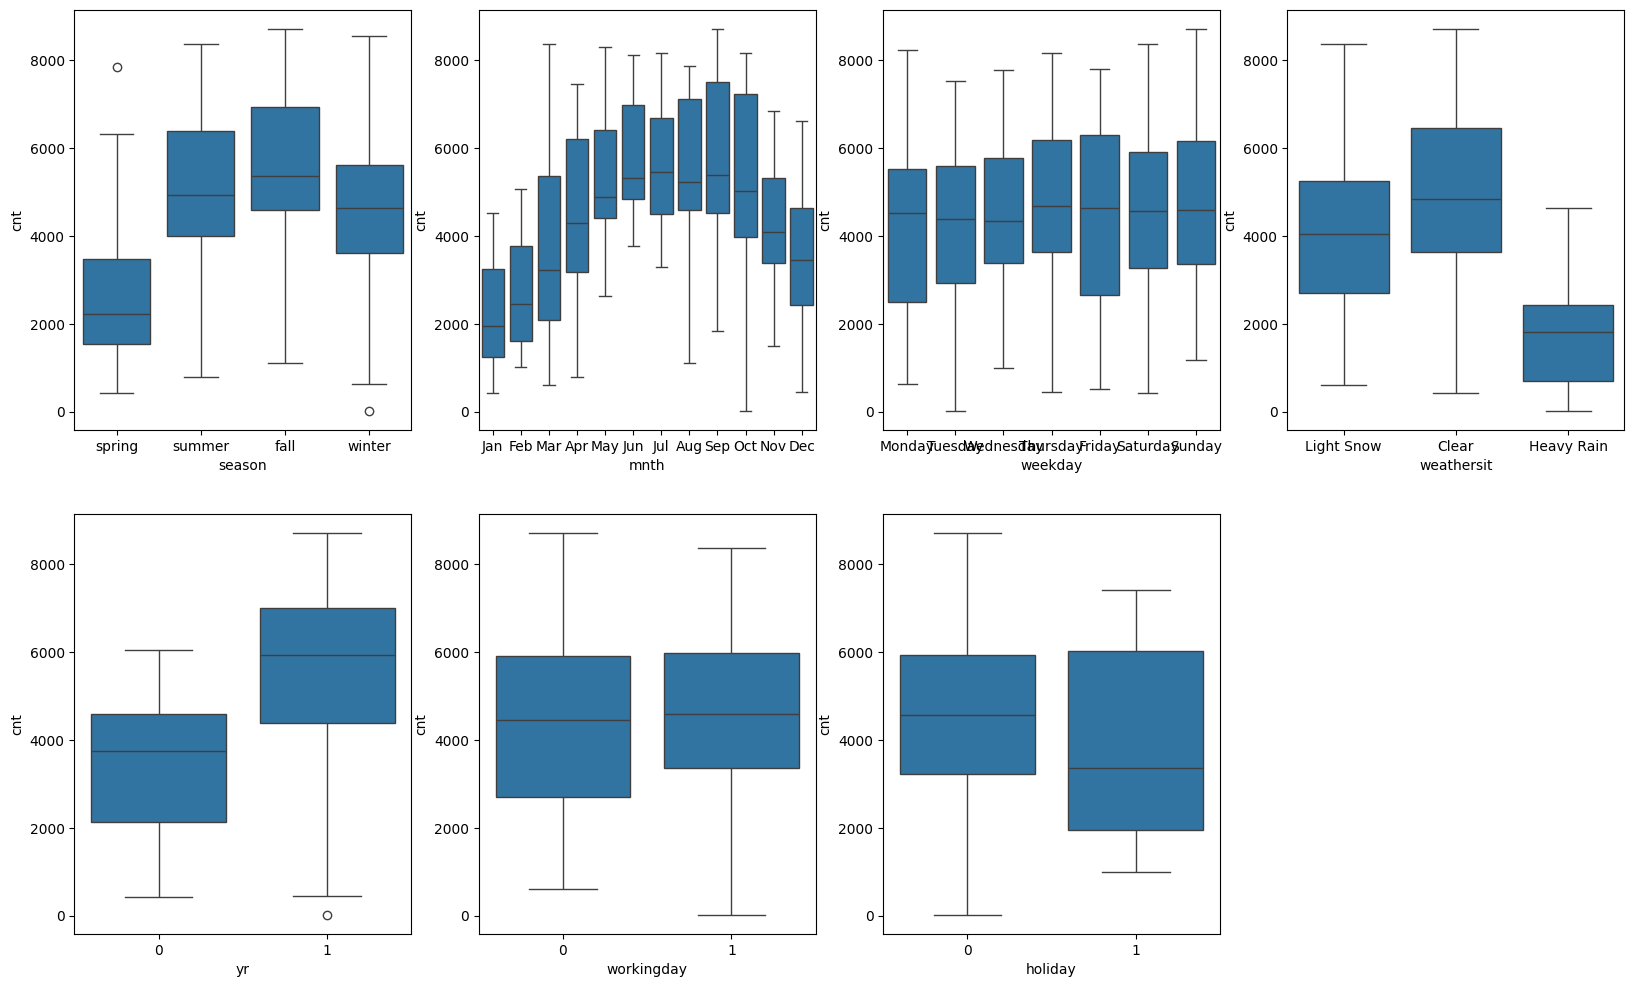

In [12]:
plt.figure(figsize=(20, 12))
plt.subplot(2, 4, 1)
sns.boxplot(x='season', y='cnt', data=df)
plt.subplot(2, 4, 2)
sns.boxplot(x='mnth', y='cnt', data=df)
plt.subplot(2, 4, 3)
sns.boxplot(x='weekday', y='cnt', data=df)
plt.subplot(2, 4, 4)
sns.boxplot(x='weathersit', y='cnt', data=df)
plt.subplot(2, 4, 5)
sns.boxplot(x='yr', y='cnt', data=df)
plt.subplot(2, 4, 6)
sns.boxplot(x='workingday', y='cnt', data=df)
plt.subplot(2, 4, 7)
sns.boxplot(x='holiday', y='cnt', data=df)
plt.show()

### Step 3: Data Preparation

#### Need to convert the categorical data to 0s and 1s
If the columns has multiple levels, then we will use get_dummies to convert to 0s and 1s

In [13]:
months=pd.get_dummies(df.mnth,drop_first=True,dtype=int)
weekdays=pd.get_dummies(df.weekday,drop_first=True,dtype=int)
weather_sit=pd.get_dummies(df.weathersit,drop_first=True,dtype=int)
seasons=pd.get_dummies(df.season,drop_first=True,dtype=int)

In [14]:
df=pd.concat([months,weekdays,weather_sit,seasons,df],axis=1)
df.drop(["season","mnth","weekday","weathersit"],axis=1,inplace=True)
df.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,...,winter,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
0,0,0,0,1,0,0,0,0,0,0,...,0,2018-01-01,0,0,0,14.110847,18.18125,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,0,2018-01-02,0,0,0,14.902598,17.68695,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,0,2018-01-03,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,0,2018-01-04,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,0,2018-01-05,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


In [15]:
# dropping the unnecesary columns
df.drop(["dteday","atemp"],axis=1,inplace=True)

### Step 4: Splitting the Data into Training and Testing Sets

In [16]:
# Splitting the data into train and test 70% and 30% resp.

from sklearn.model_selection import train_test_split
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

Applying Scaling to the data as it will bring the data into the same scale

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [18]:
# Apply scaler() to all the columns except the 'dummy' variables and 0 and 1 data
num_vars = ['temp','hum','windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [19]:
df_train.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,...,spring,summer,winter,yr,holiday,workingday,temp,hum,windspeed,cnt
653,0,0,0,0,0,0,0,0,0,1,...,0,0,1,1,0,1,0.509887,0.575354,0.300794,0.864243
576,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0.815169,0.725633,0.264686,0.827658
426,0,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0.442393,0.640189,0.255342,0.465255
728,0,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0.245101,0.498067,0.663106,0.204096
482,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0.395666,0.504508,0.188475,0.482973


In [20]:
df_train.describe()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,...,spring,summer,winter,yr,holiday,workingday,temp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,...,0.243137,0.245098,0.24902,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.513620
std,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,...,0.429398,0.430568,0.43287,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


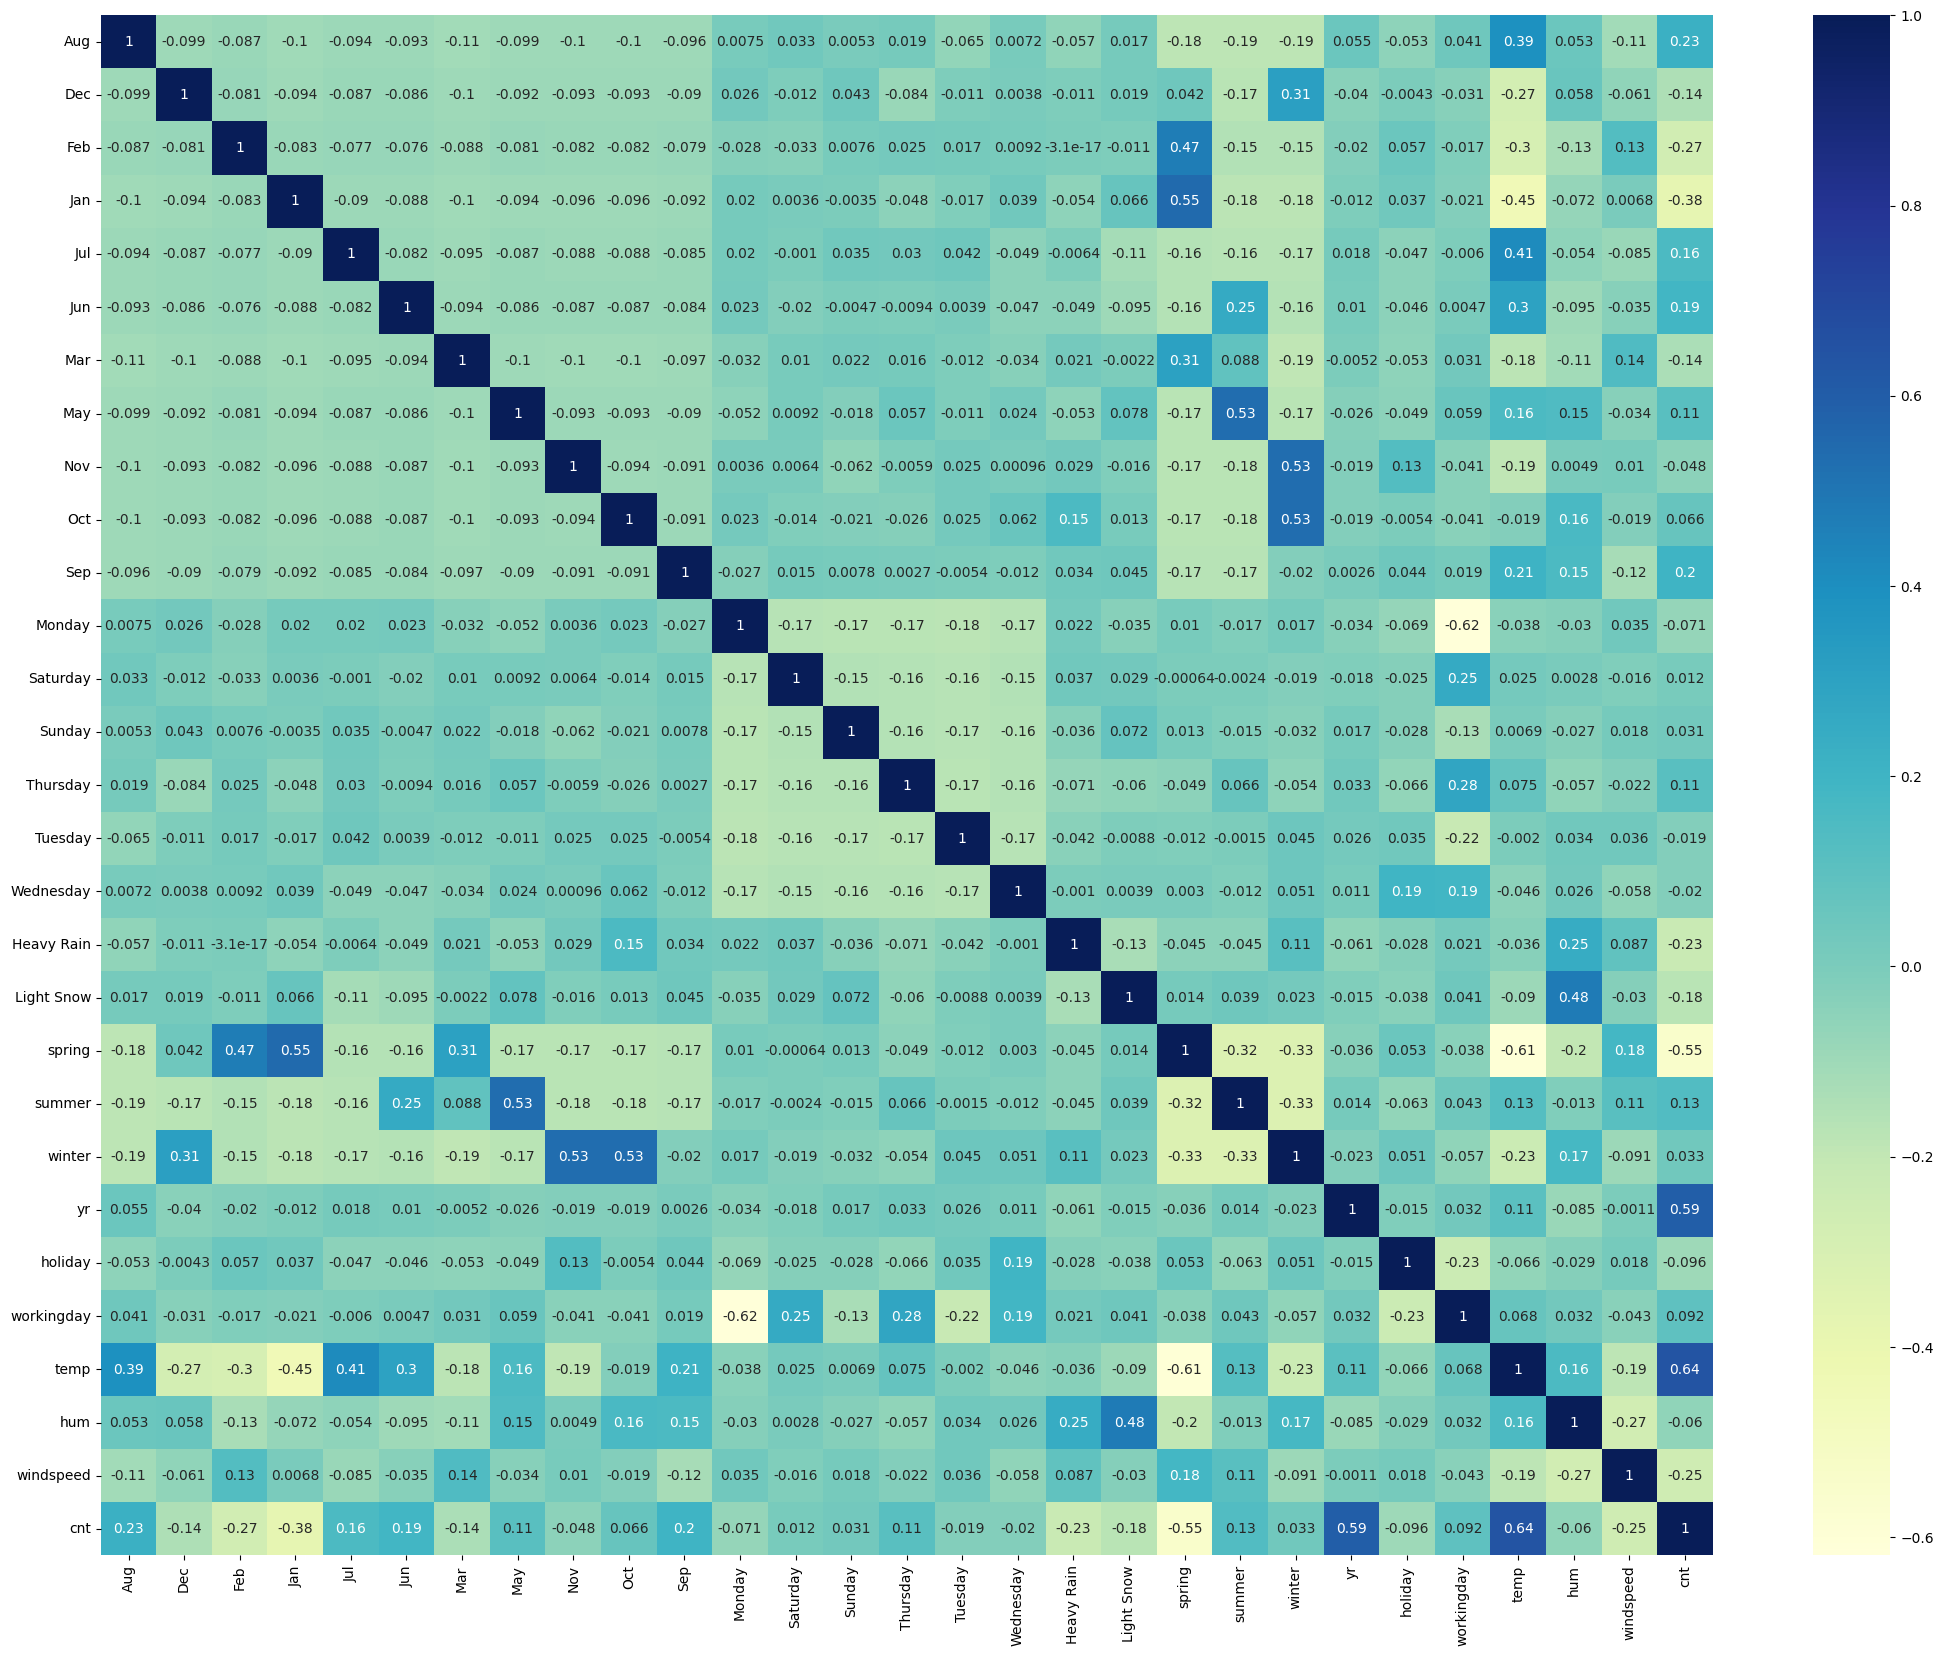

In [21]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (26, 20))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Dividing the data into X and Y sets for model building

In [22]:
y_train = df_train.pop('cnt')
X_train = df_train

### Step 5: Building the Model

In [23]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a fitted model with all variables, later using RFE, we will drop the irrelevant variables
lr = sm.OLS(y_train, X_train_lm).fit()

In [24]:

lr.params

const         0.332246
Aug           0.020841
Dec          -0.044909
Feb          -0.036749
Jan          -0.063215
Jul          -0.035557
Jun           0.000345
Mar           0.000490
May           0.023423
Nov          -0.042715
Oct           0.006412
Sep           0.086134
Monday       -0.024033
Saturday      0.003295
Sunday        0.009911
Thursday      0.003733
Tuesday      -0.025683
Wednesday    -0.010418
Heavy Rain   -0.251377
Light Snow   -0.059190
spring       -0.043368
summer        0.042418
winter        0.110165
yr            0.231256
holiday      -0.083874
workingday    0.000673
temp          0.447038
hum          -0.156498
windspeed    -0.183726
dtype: float64

In [25]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     97.86
Date:                Wed, 29 May 2024   Prob (F-statistic):          6.19e-179
Time:                        15:39:22   Log-Likelihood:                 523.43
No. Observations:                 510   AIC:                            -988.9
Df Residuals:                     481   BIC:                            -866.1
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3322      0.047      6.995      0.000       0.239       0.426
Aug            0.0208      0.034      0.612      0.541      -0.046       0.088
Dec           -0.0449      0.034     -1.325      0.186      -0.112       0.022
Feb           -0.0367      0.033     -1.104      0.270      -0.102       0.029
Jan           -0.0632      0.034     -1.866      0.063      -0.130       0.003
Jul           -0.0356      0.035     -1.003      0.316      -0.105       0.034
Jun            0.0003      0.025      0.014      0.989      -0.049       0.050
Mar            0.0005      0.025      0.020      0.984      -0.048       0.049
May            0.0234      0.021      1.104      0.270      -0.018       0.065
Nov           -0.0427      0.037     -1.164      0.245      -0.115       0.029
Oct            0.0064      0.036      0.177      0.859      -0.065       0.077
Sep            0.0861      0.032      2.667      0.008       0.023       0.150
Monday        -0.0240      0.021     -1.155      0.249      -0.065       0.017
Saturday       0.0033      0.015      0.217      0.828      -0.027       0.033
Sunday         0.0099      0.017      0.599      0.549      -0.023       0.042
Thursday       0.0037      0.015      0.249      0.803      -0.026       0.033
Tuesday       -0.0257      0.017     -1.541      0.124      -0.058       0.007
Wednesday     -0.0104      0.015     -0.683      0.495      -0.040       0.020
Heavy Rain    -0.2514      0.027     -9.443      0.000      -0.304      -0.199
Light Snow    -0.0592      0.011     -5.613      0.000      -0.080      -0.038
spring        -0.0434      0.030     -1.432      0.153      -0.103       0.016
summer         0.0424      0.026      1.603      0.110      -0.010       0.094
winter         0.1102      0.028      3.910      0.000       0.055       0.166
yr             0.2313      0.008     28.452      0.000       0.215       0.247
holiday       -0.0839      0.029     -2.899      0.004      -0.141      -0.027
workingday     0.0007      0.015      0.045      0.964      -0.029       0.030
temp           0.4470      0.047      9.546      0.000       0.355       0.539
hum           -0.1565      0.039     -4.026      0.000      -0.233      -0.080
windspeed     -0.1837      0.026     -7.058      0.000      -0.235      -0.133
==============================================================================
Omnibus:                       78.297   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              204.155
Skew:                          -0.768   Prob(JB):                     4.66e-45
Kurtosis:                       5.692   Cond. No.                         38.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is co

Looking at the p-values, it looks like some of the variables aren't really significant (in the presence of other variables).

Maybe we could drop some?

We could simply drop the variable with the highest, non-significant p value. A better way would be to supplement this with the VIF information. 

### Checking VIF

In [26]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [27]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
26,hum,38.26
25,temp,38.12
19,spring,12.06
21,winter,11.88
24,workingday,8.52
20,summer,7.37
9,Oct,6.49
8,Nov,6.18
0,Aug,6.05
4,Jul,5.44


We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.

Since we have long list of columns to be removed, we will use RFE to eliminate the unwanted columns

In [28]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [29]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [30]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Aug', False, 6),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 14),
 ('Mar', False, 13),
 ('May', False, 5),
 ('Nov', True, 1),
 ('Oct', False, 9),
 ('Sep', True, 1),
 ('Monday', False, 4),
 ('Saturday', False, 11),
 ('Sunday', False, 8),
 ('Thursday', False, 10),
 ('Tuesday', False, 3),
 ('Wednesday', False, 7),
 ('Heavy Rain', True, 1),
 ('Light Snow', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 12),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1)]

In [31]:
col = X_train.columns[rfe.support_]
col

Index(['Dec', 'Jan', 'Jul', 'Nov', 'Sep', 'Heavy Rain', 'Light Snow', 'spring',
       'summer', 'winter', 'yr', 'holiday', 'temp', 'hum', 'windspeed'],
      dtype='object')

In [32]:
X_train.columns[~rfe.support_]

Index(['Aug', 'Feb', 'Jun', 'Mar', 'May', 'Oct', 'Monday', 'Saturday',
       'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'workingday'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [33]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [34]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [35]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [36]:
#Let's see the summary of our linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Wed, 29 May 2024   Prob (F-statistic):          3.34e-189
Time:                        15:39:27   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3202      0.036      8.886      0.000       0.249       0.391
Dec           -0.0372      0.017     -2.131      0.034      -0.071      -0.003
Jan           -0.0437      0.018     -2.415      0.016      -0.079      -0.008
Jul           -0.0555      0.018     -3.046      0.002      -0.091      -0.020
Nov           -0.0409      0.019     -2.187      0.029      -0.078      -0.004
Sep            0.0749      0.017      4.438      0.000       0.042       0.108
Heavy Rain    -0.2481      0.026     -9.402      0.000      -0.300      -0.196
Light Snow    -0.0559      0.010     -5.338      0.000      -0.076      -0.035
spring        -0.0617      0.021     -2.907      0.004      -0.103      -0.020
summer         0.0408      0.015      2.659      0.008       0.011       0.071
winter         0.1034      0.018      5.763      0.000       0.068       0.139
yr             0.2303      0.008     28.511      0.000       0.214       0.246
holiday       -0.0912      0.026     -3.566      0.000      -0.141      -0.041
temp           0.4800      0.037     12.977      0.000       0.407       0.553
hum           -0.1602      0.038     -4.240      0.000      -0.234      -0.086
windspeed     -0.1885      0.026     -7.312      0.000      -0.239      -0.138
==============================================================================
Omnibus:                       67.327   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.896
Skew:                          -0.684   Prob(JB):                     1.56e-36
Kurtosis:                       5.427   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
#Drop the constant term B0
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [38]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,hum,30.94
12,temp,17.80
14,windspeed,4.72
7,spring,4.37
9,winter,4.06
8,summer,2.81
6,Light Snow,2.32
10,yr,2.09
3,Nov,1.83
1,Jan,1.75


In [39]:
#Drop January
X_train_new1 = X_train_rfe.drop(["Jan"], axis = 1)

In [40]:
X_train_lm1 = sm.add_constant(X_train_new1)
lm1 = sm.OLS(y_train,X_train_lm1).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.8
Date:                Wed, 29 May 2024   Prob (F-statistic):          4.24e-189
Time:                        15:39:28   Log-Likelihood:                 511.73
No. Observations:                 510   AIC:                            -993.5
Df Residuals:                     495   BIC:                            -929.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3006      0.035      8.521      0.000       0.231       0.370
Dec           -0.0265      0.017     -1.561      0.119      -0.060       0.007
Jul           -0.0577      0.018     -3.155      0.002      -0.094      -0.022
Nov           -0.0351      0.019     -1.884      0.060      -0.072       0.002
Sep            0.0771      0.017      4.555      0.000       0.044       0.110
Heavy Rain    -0.2434      0.026     -9.203      0.000      -0.295      -0.191
Light Snow    -0.0555      0.011     -5.275      0.000      -0.076      -0.035
spring        -0.0655      0.021     -3.076      0.002      -0.107      -0.024
summer         0.0461      0.015      3.024      0.003       0.016       0.076
winter         0.1088      0.018      6.076      0.000       0.074       0.144
yr             0.2294      0.008     28.289      0.000       0.213       0.245
holiday       -0.0925      0.026     -3.598      0.000      -0.143      -0.042
temp           0.5090      0.035     14.485      0.000       0.440       0.578
hum           -0.1680      0.038     -4.439      0.000      -0.242      -0.094
windspeed     -0.1813      0.026     -7.047      0.000      -0.232      -0.131
==============================================================================
Omnibus:                       63.739   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              154.864
Skew:                          -0.651   Prob(JB):                     2.35e-34
Kurtosis:                       5.365   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
#Drop the constant term B0
X_train_lm1 = X_train_lm1.drop(['const'], axis=1)

In [42]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,hum,29.35
11,temp,16.75
13,windspeed,4.72
8,winter,4.06
6,spring,4.04
7,summer,2.80
5,Light Snow,2.31
9,yr,2.08
2,Nov,1.82
1,Jul,1.59


In [43]:
X_train_new2 = X_train_lm1.drop(["hum"], axis = 1)

In [44]:
X_train_lm2 = sm.add_constant(X_train_new2)
lm2 = sm.OLS(y_train,X_train_lm2).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     196.6
Date:                Wed, 29 May 2024   Prob (F-statistic):          4.46e-186
Time:                        15:39:30   Log-Likelihood:                 501.77
No. Observations:                 510   AIC:                            -975.5
Df Residuals:                     496   BIC:                            -916.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2198      0.031      7.140      0.000       0.159       0.280
Dec           -0.0325      0.017     -1.888      0.060      -0.066       0.001
Jul           -0.0526      0.019     -2.831      0.005      -0.089      -0.016
Nov           -0.0352      0.019     -1.851      0.065      -0.073       0.002
Sep            0.0704      0.017      4.100      0.000       0.037       0.104
Heavy Rain    -0.2899      0.025    -11.722      0.000      -0.339      -0.241
Light Snow    -0.0824      0.009     -9.417      0.000      -0.100      -0.065
spring        -0.0765      0.022     -3.553      0.000      -0.119      -0.034
summer         0.0390      0.015      2.527      0.012       0.009       0.069
winter         0.0940      0.018      5.246      0.000       0.059       0.129
yr             0.2334      0.008     28.436      0.000       0.217       0.250
holiday       -0.0934      0.026     -3.567      0.000      -0.145      -0.042
temp           0.4689      0.035     13.554      0.000       0.401       0.537
windspeed     -0.1486      0.025     -5.918      0.000      -0.198      -0.099
==============================================================================
Omnibus:                       66.739   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.813
Skew:                          -0.675   Prob(JB):                     1.63e-36
Kurtosis:                       5.436   Cond. No.                         18.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
X_train_lm2=X_train_lm2.drop(['const'],axis=1)

In [46]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,temp,5.12
12,windspeed,4.65
8,winter,2.90
7,summer,2.22
6,spring,2.13
9,yr,2.07
2,Nov,1.79
1,Jul,1.59
5,Light Snow,1.55
0,Dec,1.42


In [47]:
#Drop the holiday column
X_train_new3=X_train_lm2.drop(['holiday'],axis=1)

In [48]:
# Adding a constant variable 
X_train_lm3 = sm.add_constant(X_train_new3)
lm3 = sm.OLS(y_train,X_train_lm3).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     207.0
Date:                Wed, 29 May 2024   Prob (F-statistic):          1.58e-184
Time:                        15:39:31   Log-Likelihood:                 495.31
No. Observations:                 510   AIC:                            -964.6
Df Residuals:                     497   BIC:                            -909.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2201      0.031      7.067      0.000       0.159       0.281
Dec           -0.0334      0.017     -1.915      0.056      -0.068       0.001
Jul           -0.0517      0.019     -2.748      0.006      -0.089      -0.015
Nov           -0.0432      0.019     -2.263      0.024      -0.081      -0.006
Sep            0.0662      0.017      3.817      0.000       0.032       0.100
Heavy Rain    -0.2866      0.025    -11.462      0.000      -0.336      -0.237
Light Snow    -0.0810      0.009     -9.156      0.000      -0.098      -0.064
spring        -0.0804      0.022     -3.693      0.000      -0.123      -0.038
summer         0.0386      0.016      2.467      0.014       0.008       0.069
winter         0.0934      0.018      5.155      0.000       0.058       0.129
yr             0.2338      0.008     28.155      0.000       0.217       0.250
temp           0.4672      0.035     13.349      0.000       0.398       0.536
windspeed     -0.1496      0.025     -5.890      0.000      -0.200      -0.100
==============================================================================
Omnibus:                       76.249   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              199.017
Skew:                          -0.748   Prob(JB):                     6.08e-44
Kurtosis:                       5.670   Cond. No.                         18.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
X_train_lm3=X_train_lm3.drop(['const'],axis=1)

In [50]:
vif = pd.DataFrame()
X = X_train_new3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,temp,5.12
11,windspeed,4.65
8,winter,2.90
7,summer,2.22
6,spring,2.12
9,yr,2.07
2,Nov,1.77
1,Jul,1.58
5,Light Snow,1.54
0,Dec,1.42


In [51]:
X_train_new4= X_train_lm3.drop(['windspeed'], axis=1)

In [52]:
X_train_lm4=sm.add_constant(X_train_new4)
lm4=sm.OLS(y_train,X_train_lm4).fit()
lm4.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     208.5
Date:                Wed, 29 May 2024   Prob (F-statistic):          1.90e-178
Time:                        15:39:33   Log-Likelihood:                 478.11
No. Observations:                 510   AIC:                            -932.2
Df Residuals:                     498   BIC:                            -881.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1696      0.031      5.481      0.000       0.109       0.230
Dec           -0.0280      0.018     -1.554      0.121      -0.063       0.007
Jul           -0.0520      0.019     -2.677      0.008      -0.090      -0.014
Nov           -0.0474      0.020     -2.407      0.016      -0.086      -0.009
Sep            0.0704      0.018      3.935      0.000       0.035       0.106
Heavy Rain    -0.3012      0.026    -11.716      0.000      -0.352      -0.251
Light Snow    -0.0793      0.009     -8.678      0.000      -0.097      -0.061
spring        -0.0902      0.022     -4.024      0.000      -0.134      -0.046
summer         0.0288      0.016      1.791      0.074      -0.003       0.060
winter         0.0949      0.019      5.068      0.000       0.058       0.132
yr             0.2328      0.009     27.145      0.000       0.216       0.250
temp           0.4800      0.036     13.298      0.000       0.409       0.551
==============================================================================
Omnibus:                       78.124   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              209.514
Skew:                          -0.757   Prob(JB):                     3.20e-46
Kurtosis:                       5.751   Cond. No.                         17.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
X_train_lm4= X_train_lm4.drop(['const'], axis=1)

In [54]:
vif = pd.DataFrame()
X =X_train_new4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,temp,4.22
8,winter,2.76
9,yr,2.06
7,summer,1.93
2,Nov,1.75
1,Jul,1.58
5,Light Snow,1.54
6,spring,1.43
0,Dec,1.42
3,Sep,1.34


### Step 6: Residual Analysis of the train data

In [55]:
X_train_lm4

,Dec,Jul,Nov,Sep,Heavy Rain,Light Snow,spring,summer,winter,yr,temp
653,0,0,0,0,0,0,0,0,1,1,0.509887
576,0,1,0,0,0,0,0,0,0,1,0.815169
426,0,0,0,0,0,1,1,0,0,1,0.442393
728,1,0,0,0,0,0,1,0,0,1,0.245101
482,0,0,0,0,0,1,0,1,0,1,0.395666
...,...,...,...,...,...,...,...,...,...,...,...
526,0,0,0,0,0,1,0,1,0,1,0.824514
578,0,0,0,0,0,0,0,0,0,1,0.863973
53,0,0,0,0,0,0,1,0,0,0,0.202618
350,1,0,0,0,0,1,0,0,1,0,0.248216


In [56]:
X_train_lm5 = sm.add_constant(X_train_lm4)

In [57]:
y_train_pred = lm4.predict(X_train_lm5)

C:\Users\manoj.shah\AppData\Local\Temp\ipykernel_31048\3394994029.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train - y_train_pred), bins = 20)


<Figure size 640x480 with 0 Axes>

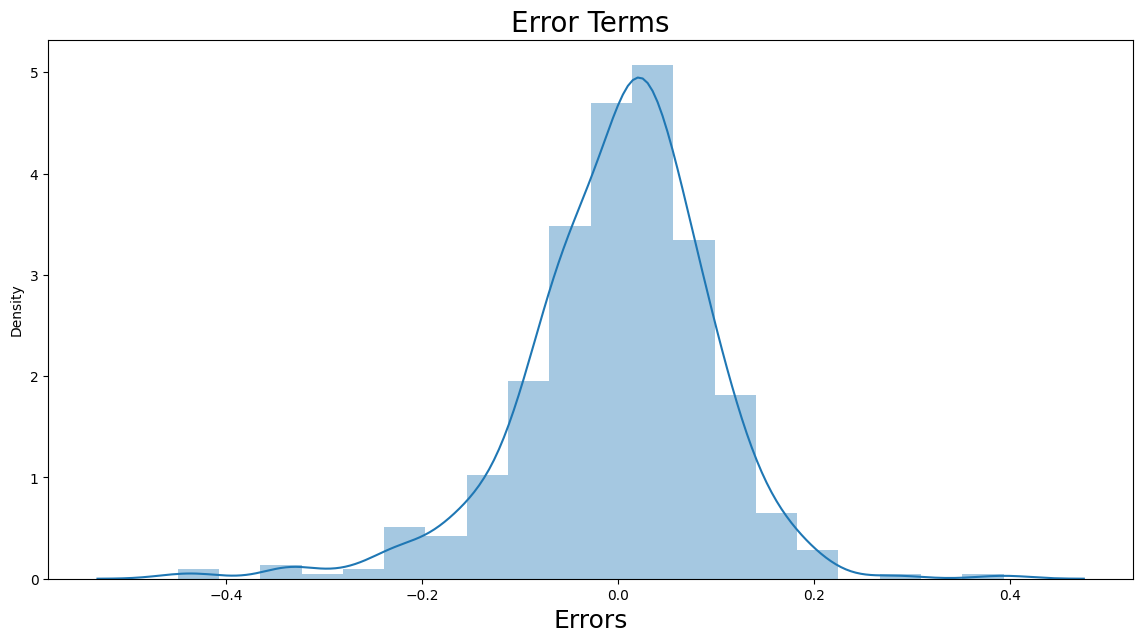

In [58]:
fig = plt.figure()
plt.figure(figsize=(14,7))
sns.distplot((y_train - y_train_pred), bins = 20)
plt.title('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  # X-label
plt.show()

We can see Error terms are normally distributed

### Step 7: Making Predictions

In [59]:
num_vars=['temp','hum','windspeed','cnt']

#Fit on data
df[num_vars] = scaler.transform(df[num_vars])
df.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,...,spring,summer,winter,yr,holiday,workingday,temp,hum,windspeed,cnt
0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0.355170,0.830399,0.253982,0.110792
1,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0.379232,0.717307,0.443364,0.089623
2,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0.171000,0.450603,0.442870,0.152669
3,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0.175530,0.608434,0.253659,0.177174
4,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0.209120,0.450278,0.310853,0.181546


In [60]:
y_test = df.pop('cnt')
X_test = df
X_test.describe()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,...,Light Snow,spring,summer,winter,yr,holiday,workingday,temp,hum,windspeed
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.084932,0.084932,0.076712,0.084932,0.084932,0.082192,0.084932,0.084932,0.082192,0.084932,...,0.336986,0.246575,0.252055,0.243836,0.500000,0.028767,0.683562,0.543852,0.646786,0.318596
std,0.278971,0.278971,0.266317,0.278971,0.278971,0.274845,0.278971,0.278971,0.274845,0.278971,...,0.473004,0.431313,0.434490,0.429689,0.500343,0.167266,0.465405,0.228140,0.146716,0.166717
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.042808
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.346084,0.535852,0.199170
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,1.000000,0.548307,0.645341,0.298115
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.743261,0.752146,0.410427
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.002146,1.000000


In [61]:
X_test_new = X_test[X_train_new4.columns]

# Adding a constant variable 
X_test_new1 = sm.add_constant(X_test_new)
X_test_new1.head()

,const,Dec,Jul,Nov,Sep,Heavy Rain,Light Snow,spring,summer,winter,yr,temp
0,1.0,0,0,0,0,0,1,1,0,0,0,0.355170
1,1.0,0,0,0,0,0,1,1,0,0,0,0.379232
2,1.0,0,0,0,0,0,0,1,0,0,0,0.171000
3,1.0,0,0,0,0,0,0,1,0,0,0,0.175530
4,1.0,0,0,0,0,0,0,1,0,0,0,0.209120


In [62]:
# Making predictions
y_pred = lm4.predict(X_test_new1)

Finding R-squared and Adjusted R-Squared for Test set


In [63]:
#Evaluate R-square for test
from sklearn.metrics import r2_score
r2_score_value = r2_score(y_test,y_pred)
r2_score_value

0.8200852351951526

In [64]:
Adj_r2=1-(1-r2_score_value)*(12-1)/(12-1-1)
print(Adj_r2)

0.8020937587146679


### Step 8: Model Evaluation

Text(0, 0.5, 'y_pred')

<Figure size 640x480 with 0 Axes>

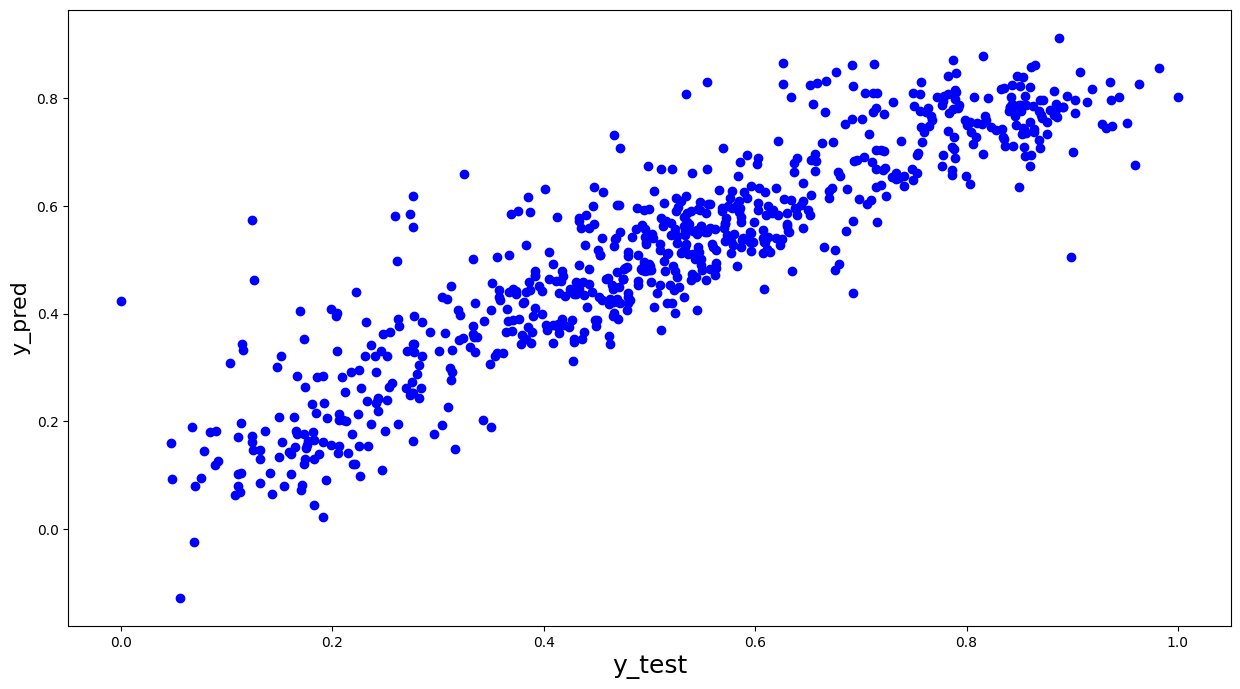

In [65]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.figure(figsize=(15,8))
plt.scatter(y_test,y_pred,color='blue')
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

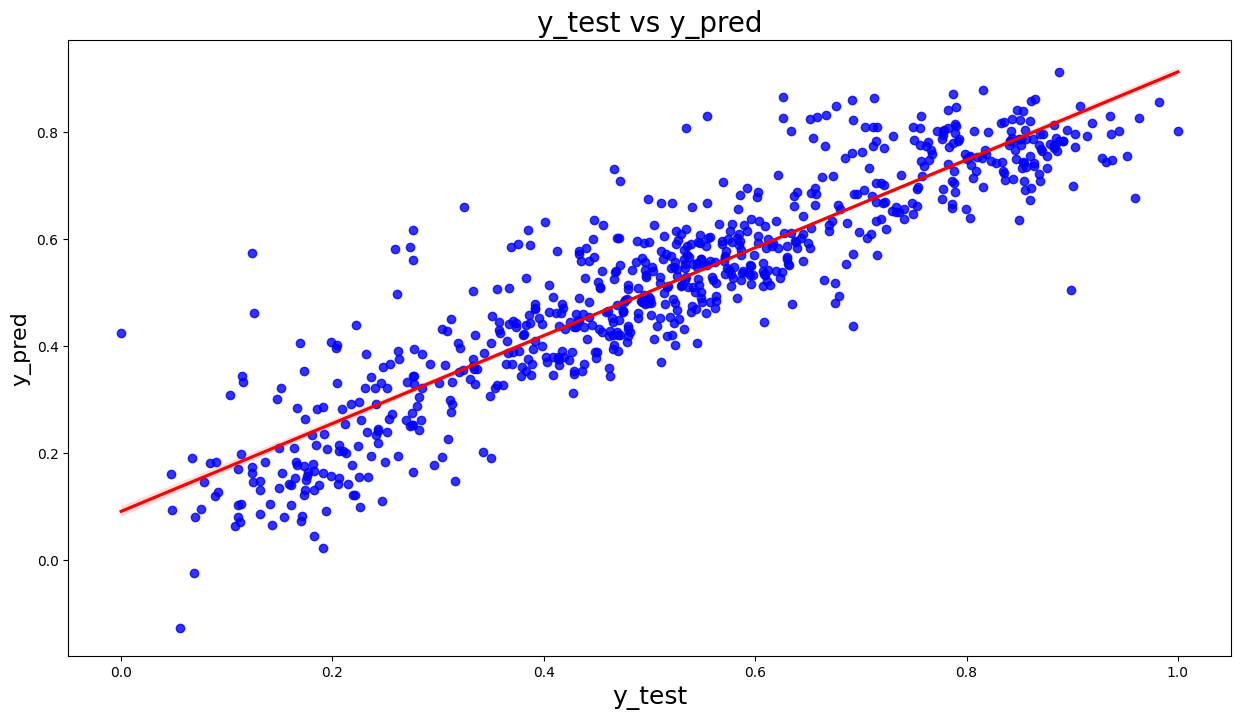

In [66]:
#Regression plot
plt.figure(figsize=(15,8))
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.title('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

### Final Result Comparison between Train model and Test

- Train R^2 : 0.822
- Train Adjusted R^2 : 0.818
- Test R^2 : 0.820
- Test Adjusted R^1 : 0.802

- Difference in R^2 between train and test : < 5%
- Difference in Adjusted R^2 between train and test : < 5%

### Business Goals
    - The bike sharing system depends mainly on temperature
    - The negative coefficient impplies some offers needs to be roll out to increase the demand